<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DataDrivenWebApps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Driven Webapps

A data scientist has been given a new data set, they've analyzed the data in Jupyter or R-Studio. Further they created a repeatable process that will work with new data.  They are now confronted with a new problem.  As new data comes in that process must be replicated.  While the data scientist could certainly load the data into their tool of of choice and rerun the analysis, that is time consuming and often requires recommunicating results.  Further if following processes need the results of the analysis, this method is not automated.  

The above senario is very common and often the data scientist is left with two options: 1) work with software developers to create a user interface and potential backend components for automated processes 2) create a user interface the best they can often using python scripts to glue the analysis together 3) become a front end developer themselves and learn significant amounts of HTML and javascript.  Unfortunately, option 1 can cost significant amounts of time and money so often is only available if significant return on investment can be shown.  Meanwhile, option 2 often provides the end user with a poor experience which may mean the tool is never used. Finally, option 3 means the data scientist is taking it upon themselves to essential do option 1 themselves. Indeed, it's often been the authors experience that the most difficult part of data science is not analyzing data or creating models, but gaining adoption of finished data products.

Fortunately, within the python ecosystem there are a number of libraries designed to make both frontend and backend web development easier and without the need to build applications in HTML and Javascript which may be unfamialar to the data scientist.  Unfortunately, these libraries are relatively new and documentation is somewhat sparse with the ecosystem around the tools is quite broad, often using concepts that a data scientist may be unfamiliar with.

In this course we attempt to survey this ecosystem and give more context to the tools so that a data scientist will have full command over these tools and be able to create data driven web applications to enable end users to use their work and create backend tooling so software developers will be able to leverage there work in a programatic fashion.  It is organized as follows:

Chapter 1 will go over the basics of how to make interactive jupyter notebooks using Jupyter widgets.

Chapter 2 will cover object oriented programming and a deeper dive into Jupyter Widgets.

Chapter 3 will be a deep dive into jupyter widgets, pandas interaction and plotting.

Chapter 4 will cover layouts and creating standalone webapps in Jupyter with Voila.

Chapter 5 will cover the basics of REST, the requests library and flask.

Chapter 6 will cover code reuse to use for both Webapps and REST.

Chapter 7 will cover deployment of Webapps and REST APIs in Azure.



# Jupyter Widgets

Often a data scientist finds themselves performing the same analysis but with different parameters.  For instance perhaps you'd like to create a word cloud on a particular twitter user, but the next day you may change this to a different user.

Often we do this by setting a global variable and then running the other cells of our notebook.  This following snippet is an example:

```
#we can change this
user=@realdolandtrump
...
# use twitter api to pull tweets
...
# aggregate tweats and form a word cloud
```

This is however slightly clunky for endusers and still annoying for a data scientist.

One solutions is Jupyter widgets which enbedd HTML objects into your Jupyter Notebook and use a Javascript bridge to allow you to interact with the HTML using python.

In the following cell we create a "hello world" application for jupyter widgets.

In [ ]:
#@title
from ipywidgets import Text, Button, Label, VBox, HBox, GridBox, Layout
nameText = Text(description='name', value = 'name here')
button = Button(description='say hello!')
label = Label(visible=False)
def say_hello(btn):
  label.value = f'hello {nameText.value}'
  label.visible=True
button.on_click(say_hello)
display(nameText)
display(button)
display(label)

Text(value='name here', description='name')

Button(description='say hello!', style=ButtonStyle())

Label(value='')

What does this code do?  The first line is an import statement, we import the classes Text, Button, and Label.  The next three lines instantiate the variables nameText, label and button.  The next line defines a function say_hello.  Now we have the line
```
button.on_click(foo)
```
This is defining a *callback*, this tells the program to call the function say_hello after the button is clicked.  Note say_hello took a parament b, that is the event data passed to the call be.  We will discuss that more later.

Finally, the display commands simply display the widgets as rendered HTML.

Note that the function we defined `say_hello` took a parameter, `btn` we didn't use.  One nice feature about the callback is it sends the button object as a parameter.  This allows us to get information about the button we clicked.  Run the code below.

In [ ]:
button_a = Button(description='a')
button_b = Button(description='b')
def say_clicked(btn):
  print(f'You clicked {btn.description}')
button_a.on_click(say_clicked)
button_b.on_click(say_clicked)
display(button_a)
display(button_b)

Button(description='a', style=ButtonStyle())

Button(description='b', style=ButtonStyle())

You clicked a
You clicked a
You clicked b
You clicked b
You clicked b
You clicked a


Note that the display command gives us little ability to control how the the 

1.   List item
2.   List item

Text, Label and Button are renders. This is where containers and layouts come into play. The simplest containers are VBox and HBox. Note the difference in dispay in the next two cells.

In [1]:
HBox([nameText, button, label])

NameError: ignored

In [ ]:
VBox([nameText, button, label])

Containers can also be nested.


In [ ]:
VBox([HBox([nameText, button]), label])

GridBox offers an easier method of laying out objects without nesting containers.

In [ ]:
GridBox([nameText, Label(''), button,Label(''), Label(''),label], layout = Layout(grid_template_columns='1fr 1fr 1fr') )

GridBox(children=(Text(value='name here', description='name'), Label(value=''), Button(description='say hello!…

# Exercises

## Exercise 1
The code in the following cell creates a grid the looks like a calculator. The number and operator buttons all use the on_click function as a call back to modify the value text box.  
- The button_equals uses the on_click_equals function for its callback.  Modify this function so it evaluates the expression in the value text box and puts that value in the text box.
- Add a forth row to calculator.  This buttons in the row should be '(', ')', '^', and 'C'.
- Define a function on_click_clear which sets the value textbox to an empty string.
- Set the call back of the '(', ')' and '^' buttons to on_click.  Note that the proper exponentiation operator in python is ** so make sure to replace '^' with '**' prior to evaluating the string in on_click_equals.
- There a number of ways on_click_equals might fail, use a try, except block to catch the err.  If an error is caught, simply change the value textbox to say "ERROR".
- Making your notebooks visually appealling is necessary to provide a good user experience.  Read the documentation of VBox, HBox, FlexBox and Gridbox [here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html#The-Grid-layout).
    - Make the buttons a predefined percent of the total hight and width.
    - Make the total height 4 inches and the total width 3.5 inches.


In [ ]:
from ipywidgets import Text, Button, Label, VBox, HBox, GridBox, Layout
def on_click(btn):
  value.value += btn.description
def on_click_equals(btn):
  pass
button_0 = Button(description='0')
button_1 = Button(description='1')
button_2 = Button(description='2')
button_3 = Button(description='3')
button_4 = Button(description='4')
button_5 = Button(description='5')
button_6 = Button(description='6')
button_7 = Button(description='7')
button_8 = Button(description='8')
button_9 = Button(description='9')
button_plus = Button(description='+')
button_minus = Button(description='-')
button_times = Button(description='*')
button_div = Button(description='/')
button_decimal = Button(description='.')
button_equals = Button(description='=')
button_0.on_click(on_click)
button_1.on_click(on_click)
button_2.on_click(on_click)
button_3.on_click(on_click)
button_4.on_click(on_click)
button_5.on_click(on_click)
button_6.on_click(on_click)
button_7.on_click(on_click)
button_8.on_click(on_click)
button_9.on_click(on_click)
button_plus.on_click(on_click)
button_minus.on_click(on_click)
button_times.on_click(on_click)
button_div.on_click(on_click)
button_decimal.on_click(on_click)
button_equals.on_click(on_click_equals)
value=Text(description='', value='')
VBox([value,
GridBox([button_1, button_2, button_3, button_plus,
         button_4, button_5, button_6, button_minus,
         button_7, button_8, button_9, button_times,
         button_0, button_decimal, button_equals, button_div],
        layout = Layout(grid_template_columns='1fr 1fr 1fr 1fr'))])

## Exercise 2
We will eventually be using a number of APIs, including Twitter.  If you don't already have a Twitter account please get on, once you have done so look online for how to get an API key.

## Exercise 3

We will eventually be having to execute some code outside of Jupyter and Colab.  Install a version of Python on your machine (I recommend Anaconda, but there are other choices).  You may want to also install an Integrated Development Environment or IDE, there are many to choose from including pyCharm, Atom, and notepad++ (I like pyCharm - but again your choice).

# References
- https://ipywidgets.readthedocs.io/en/stable/



```
# This is formatted as code
```

# Object Oriented Programming

Object Oriented Programming of OOP is a programming paradigm which aims to simplify certain abstractions and maximise code reuse.  This is a broad topic that deserves more than a single chapter, however in order to understand more about how Jupyter widgets work (and indeed many aspects of Python libraries) one must have some understanding on OOP.  We do not attempt to be encyclopedic, but provide only a short summary and an explanation of how we will apply it.  Some references will be provided for further study if the reader is inclined.

## Objects and Classes
The physical world is made up of objects.  All objects will have attributes to them, some objects will also be able to perform actions.  In order to make sense of all this actions we group them into classes, such as vehicles, boats, cars, cats, and animals.  Note some classifications are heirarchical such as all boats and cars are vehicles, and cats and dogs are animals.

Software can also be viewed as being made up of objects.  This is very apparent in video games were all objects move around in the game, in modern operating systems where we have windows, buttons, text boxes, applications, and managers of windows and applications, and also in the software data scientist write - a DataFrame is an object,indeed it has many properties such as shape, column_headers, etc and actions such as pivot, apply, count, groupby.  DataFrames are the only objects you've encounters either, in Python, lists, dicts and tuples are also objects.  However, unlike the physical world where we group similar objects together based on similarities, in software we define classes of objects and instantiate them in our programs.  *Classes are the definitions of objects that exist in our programs.*  We will call the attributes defined in classes *member variables* and the actions an object in a class can perform *methods*.

### Defining classes

Suppose we wanted to work with complex numbers, which have both a real and imaginary float, and properties defining addition, substraction, muliplication and division.

We could use floats a_real, a_imaginary, b_real, b_imaginary, etc.  And define functions:
```
def complex_add(a_real, a_imaginary, b_real, b_imaginary)
def complex_minus(a_real, a_imaginary, b_real, b_imaginary)
def complex_times(a_real, a_imaginary, b_real, b_imaginary)
def complex_division(a_real, a_imaginary, b_real, b_imaginary)
```
This would work, but it would also quickly become tiresome and worse we'd be spending a great deal of time understanding implementation details verses solving the actual problem we want to work on.  It would be much nicer if we could create a ComplexNumber object a and ComplexNumber object b, and use functions like `complex_add(a,b)`, `a.add(b)`, or even better just use `a+b`.  The code below does just that. 


In [ ]:
class ComplexNumber:
  # This __init__ method is a special method initializes a new
  # instance object of a ComplexNumber.  This is similar in nature to a constructor in
  # other OOP languages.  This is not exactly correct, the __new__ method actually
  # creates the new instance object, __init__ simply initializes it. 
  def __init__(self, real=0.0, image=0.0):
    self._real = real 
    self._image = image
  def __add__(self, b):
    return ComplexNumber(self._real+b._real, self._image+b._image)
  def __mul__(self, b):
    if type(b)==int or type(b)==float:
      return ComplexNumber(self._real * b, self._image*b)
    else:
      return ComplexNumber(self._real*b._real-self._image*b._image, self._real*b._image+self._image*b._real)
  def conjugate(self):
    return ComplexNumber(self._real, -self._image)
  def modulus(self):
    return (self * self.conjugate())
  def __truediv__(self, b):
    if type(b)==int or type(b)==float:
      return ComplexNumber(self._real/b, self._image/b)
    elif type(b)==ComplexNumber and b._image==0:
      return ComplexNumber(self._real/b._real, self._image/b._real)
    else:
      return (self*b)/b.modulus()
  def __repr__(self):
    return f'{str(self._real)}+{str(self._image)}j'

Here we made use of special methods Python uses to overload operators.  Here is a list of all such methods.

|Operation| Syntax | Method |
|---|---|---|
|Addition |	p1 + p2 |	p1.\_\_add__(p2) |
|Subtraction |	p1 - p2 |	p1.\_\_sub__(p2) |
|Multiplication |	p1 * p2|	p1.\_\_mul__(p2)
|Power	| p1 ** p2|	p1.\_\_pow__(p2)
|Division	|p1 / p2|	p1.\_\_truediv__(p2)
|Floor Division|	p1 // p2|	p1.\_\_floordiv__(p2)
|Remainder (modulo)|	p1 % p2|	p1.\_\_mod__(p2)
|Bitwise Left Shift|	p1 << p2|	p1.\_\_lshift__(p2)
|Bitwise Right Shift|	p1 >> p2|	p1.\_\_rshift__(p2)
|Bitwise AND|	p1 & p2|	p1.\_\_and__(p2)
|Bitwise OR|	p1 \| p2|	p1.\_\_or__(p2)
|Bitwise XOR|	p1 ^ p2|	p1.\_\_xor__(p2)
|Bitwise NOT|	~p1|	p1.\_\_invert__()

Now we can instantiante Complex Numbers and use them with ease!

In [ ]:
a=ComplexNumber(2,2)
b=ComplexNumber(1,1)
print(a+b)
print(a*b)
print(a/b)

3+3j
0+4j
0.0+2.0j


In Python one denotes the attributes of an Class that shouldn't by modified by the user by prepending one or more underscores to the name.  Generally, one underscore means the attribute is *protected* and shouldn't be accessed by users excecpt in a class the *inherits* for the class, two underscores mean the object is *private* and should never be accessed ever.  The feature on OOP is called *encapulation*.

You've already uses objects before, in fact pandas dataframes are objects of the DataFrame class. All widgets are also objects.  This significantly reduces the amount of complexity for the user - imagine keeping track of each of a dataframe variables or that of a button widget!  Reducing the complexity of objects by hiding details of the implementation from the user is called *abstraction*, it is one of the pillars of OOP.

We can also use these same principles to encapsulate and abstract complex behaviours in our code.  For instance the snippet below allows us to create an object composed of two widgets. 

In [ ]:
from ipywidgets import Text, Button, HBox
class Greeting:
  def __init__(self):
    self._textbox = Text(description='Enter name:')
    self._button = Button(description='Say Hello!')
  def on_click(self, function):
    self._button.on_click(function)
  def value(self):
    return self._textbox.value
  def get_layout(self):
    return HBox([self._textbox, self._button])

In [ ]:
from ipywidgets import Label, VBox
greeting = Greeting()
label = Label(value='')
def greeting_click(b):
  label.value = f'hi {greeting.value()}'
greeting.on_click(greeting_click)
VBox([greeting.get_layout(), label])

# Exercises

## Exercise 1
In the complex number class:
- Create a subtraction method, it should enable using the "-" operator for complex numbers.
- The `__repr__` method returns a String representation of a complex number.  It works well but note, `print(ComplexNumber(1,-1)` displays:
`1+-1j` it work be nice if it displayed: `1-1j`.  Implement a better version of `__repr__` which does this.
- Create a division method, it should enable using the / operator.  Note for complex numbers:
 `a/b=(a*b.congutant)())/b.modulus()`


In [ ]:
class ComplexNumber:
  # This __init__ method is a special method initializes a new
  # instance object of a ComplexNumber.  This is similar in nature to a constructor in
  # other OOP languages.  This is not exactly correct, the __new__ method actually
  # creates the new instance object, __init__ simply initializes it. 
  def __init__(self, real=0.0, image=0.0):
    self._real = real 
    self._image = image
  def __add__(self, b):
    return ComplexNumber(self._real+b._real, self._image+b._image)
  def __mul__(self, b):
    if type(b)==int or type(b)==float:
      return ComplexNumber(self._real * b, self._image*b)
    else:
      return ComplexNumber(self._real*b._real-self._image*b._image, self._real*b._image+self._image*b._real)
  def conjugate(self):
    return ComplexNumber(self._real, -self._image)
  def modulus(self):
    return (self * self.conjugate())
  def __truediv__(self, b):
    if type(b)==int or type(b)==float:
      return ComplexNumber(self._real/b, self._image/b)
    elif type(b)==ComplexNumber and b._image==0:
      return ComplexNumber(self._real/b._real, self._image/b._real)
    else:
      return (self*b)/b.modulus()
  def __repr__(self):
    return f'{str(self._real)}+{str(self._image)}j'


#The below code can demonstrate the implementation
a=ComplexNumber(-1,-1)
b=ComplexNumber(2,3)
print(a)
print(b-a)
print(a-b)

-1+-1j


TypeError: ignored

## Exercise 2
In the last chapter you created a calcular, wrap that logic inside of a class and instantiate an object.  It should have the same functionality.  In addition the init function should be defined as follows:
```
def __init__(self, height, width):
```
so when displayed the calculart will be `height` inches tall and `width` inches wide.

## Exercise 3
Last week you setup a Twitter API account. First install tweepy as follows:
```
!pip install tweepy
```
Now use the class below filling in the necessary details into the on_click function to get the first ten tweets of a username's timeline.  You may find these [documentaion](https://docs.tweepy.org/en/latest/getting_started.html) and [examples](https://github.com/tweepy/examples) useful.

In [ ]:
!pip install tweepy

In [ ]:
import tweepy
from ipywidgets import HBox, VBox, Text, Button

class TwitterAPISetup:
  def __init__(self):
    self._access_key_text = Text(description="ACCESS TOKEN KEY")
    self._access_secret_text = Text(description="ACCESS TOKEN SECRET")
    self._consumer_key_text = Text(description="CONSUMER KEY")
    self._consumer_secret_text = Text(description="CONSUMER SECRET")
    self._button = Button(description="Run!")
  def on_click(self, function):
    self._button.on_click(function)
  def get_layout(self):
    return HBox([VBox([self._access_key_text, self._access_secret_text, 
                       self._consumer_key_text,self._consumer_secret_text]),
                 self._button])
  def get_api(self):
    auth = tweepy.OAuthHandler(self._consumer_key_text.value, self._consumer_secret_text.value)
    auth.set_access_token(self._access_key_text.value, self._access_secret_text.value)
    api = tweepy.API(auth)

setup = TwitterAPISetup()
screen_name = Text(description='User')
def on_setup(btn):
  setup.get_api()
  #do more things
setup.on_click(on_setup)
VBox([screen_name, setup.get_layout()])

# References
- https://ipywidgets.readthedocs.io/en/stable/
- https://docs.python.org/3/tutorial/classes.html
- https://docs.tweepy.org/en/latest/getting_started.html

# Jupyter Widgets Part 2

We've introduced the Text, Button, VBox, HBox, and GridBox Widgets.  We've also introduced the basics of OOP, so that we can understand the attributes and methods of the widgets.  The basics of OOP also allow us to encapsulate and abstract our own object which will allow us to later create more complex webapps.  Now we take the time to introduce additional widgets from both the ipywidget libray and some additional widgets specically to create data driven webapps.

## Standard Widgets

The ipywidgets library comes with a variety of standard widgets.  These are what one would expect to use in any modern webpage.  A full list is detailed in the ipywidgets documentation [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html).  All such widgets use the same layout and style properties detailed [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html).  We don't attempt the be enclopedic but to give you a basic framework for how to incorporate some of these widgets together to create a web app.  We will use the already familiar Button, VBox, and HBox widgets and incorporate the Tab, Accordian, FileUpload [Dropdown](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Dropdown) and Output widgets to allow a user to upload an image and display the image with a selected filter.

In [ ]:
from ipywidgets import Accordion, Button, Dropdown, FileUpload, HBox, Image, Output, Tab, VBox, Layout
from PIL import Image as PilImage, ImageOps
from skimage import color
import io
class FilteredImageApp:
  def __init__(self):
    self.file_upload = FileUpload(accept='image/*', multiple=False)
    self.apply_button = Button(description='Apply Filter!')
    self.apply_button.on_click(self.on_apply)
    self.output = Output()
    self.filter_choice = Dropdown(description='filter', value='None', options=['None', 'Gray'])
    self.tab = Tab(layout=Layout(height='700px'))
    self.tab.children = [self.output]
    self.tab.set_title(0,'Debug Information')
    self.header = HBox([self.filter_choice, self.file_upload, self.apply_button])
    self.container = VBox([self.header, self.tab])
  def on_apply(self, btn):
    with self.output:
      print(f'Applying new filter: {self.filter_choice.value}')
      upload_dict = self.file_upload.value
      img = list(upload_dict.values())[0]
      img_meta = img['metadata']
      img_content = img['content']
      print(img_meta)
      print(f'Name: {img_meta["name"]},Size: {img_meta["size"]}')
      if self.filter_choice.value=='None':
        img = Image(value=img_content)
      if self.filter_choice.value=='Gray':
        img_array = io.BytesIO()
        ImageOps.grayscale(PilImage.open(io.BytesIO(img_content))).save(img_array, format='PNG')
        new_img = img_array.getvalue()
        print(img_array)
        img = Image(value=new_img)
      self.tab.children = list(self.tab.children) + [img]
      self.tab.set_title(len(self.tab.children)-1, img_meta['name']+self.filter_choice.value)
  def get_layout(self):
    return self.container
FilteredImageApp().get_layout()

### Exercises
### Exercise 1 

Add an additional filter to the FilteredWebApp above.  One option is to use a neurel net filter some as [Deep Dream](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/deepdream.ipynb) or [style transfer](https://www.tensorflow.org/tutorials/generative/style_transfer), as you do this understand adding choice to the dropdown and an extended if statement is messy.  A better option is to define each filter as a function and pass the a list of tuples for the dropdown options, see if you can implement this.
### Exercise 2 
Add options to rsize the width and height of the image.  Use something other than a Text widget, you may choose to resize by percentages, pixels or inches.  

## Plot Widgets

Visualizations are at the core of data and part of the reason why jupyter has gained so much popularity among data scientists.  

The main issue with using widgets while creating plots is to turn the plot into a widget so you can place it in a proper container thereby allowing you to control where the plot is displayed.

This is made possible either by the library itself or helper libraries.  Here we demonstate how to use several popular python plotting libraries.

### matplotlib

To use matplotlib one simply uses the output widget.

In [ ]:
from ipywidgets import Output,VBox

out = Output()
with out:
    fig = plt.figure()
    plt.plot(np.cos(np.linspace(0, 20, 100)));
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False # Hide the Figure name at the top of the figure
    fig.canvas.footer_visible = False
    fig.canvas.toolbar_visible = True
    fig.canvas.capture_scroll = True
    fig.canvas
    plt.show()
VBox([out])

The Output widget also allows one to use pandas plotting features.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from ipywidgets import Output, VBox, HBox, Button, Dropdown, Layout
iris = load_iris()
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])
out = Output(layout=Layout(height='6in', width='8in'))

xScatter = Dropdown(description='x', options=iris.feature_names)
yScatter = Dropdown(description='y', options=iris.feature_names)
pd.options.plotting.backend='matplotlib'

def on_click(btn):
    out.clear_output()
    with out:
        iris_df.plot.scatter(x=xScatter.value, y=yScatter.value, c='target', colormap='viridis')
button = Button(description='plot')
button.on_click(on_click)
VBox([out, HBox([xScatter,yScatter,button])])

The next set of widgets are third party to use in colab we need the following lines.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

### Plotly

The plotly library has a Figure widge which easily turns any plotly plot into a widget.

In [ ]:
%%capture false
!pip install plotly
# Alternatively conda install plotly

In [ ]:
import plotly.express as px
from ipywidgets import VBox
import plotly.graph_objects as go
x = np.linspace(0,20,100)
y = np.sin(x)
fig = px.line(x=x, y=y, title='sine curve')
VBox([go.FigureWidget(fig)])

AttributeError: ignored

One can also use pandas backend option to use plotly objects, and have them displayed in the same way.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from ipywidgets import Output, VBox, HBox, Button, Dropdown, Layout
import plotly.graph_objects as go

iris = load_iris()
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])
pd.options.plotting.backend='plotly'

xScatter = Dropdown(description='x', options=iris.feature_names)
yScatter = Dropdown(description='y', options=iris.feature_names)
plotly_widget = go.FigureWidget(iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target'))
def on_click(btn):
    plotly_widget=go.FigureWidget(iris_df.plot.scatter(x=xScatter.value, y=yScatter.value, c='target'))
    box.children = (plotly_widget, HBox([xScatter,yScatter,button]))
button = Button(description='plot')
button.on_click(on_click)
box = VBox([plotly_widget, HBox([xScatter,yScatter,button])])
box

AttributeError: ignored

### Bokeh

[Bokeh](https://docs.bokeh.org/en/latest/index.html) requires the jupyter bokeh library to make bokeh plots into jupyter widgets.

In [ ]:
%%capture false
!pip install jupyter_bokeh
#Alternatively conda install -c bokeh jupter_bokeh

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import bokeh.models.widgets as bk
import jupyter_bokeh as jbk
import numpy as np
from ipywidgets import VBox
output_notebook()
x = np.linspace(0, 20, 100)
y = np.sin(x)
p = figure(title="sine curve", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y)
VBox([jbk.BokehModel(p)])

### Bqplot
[Bqplot](https://bqplot.readthedocs.io/en/latest/) is jupyter native, this makes many things easier.

In [ ]:
%%capture false
!pip install bqplot

In [ ]:
from bqplot import pyplot as plt
import numpy as np
size = 100
np.random.seed(0)
x = np.linspace(0,20,100)
y = np.sin(x)
fig=plt.figure(title='sine curve')
plt.plot(x, y)
VBox([fig])

While bqplot is only capable of performing 2d plots it is quite fast (especialy for large datasets when compared to plotly) and capable of plotting maps, graphs and many charts.  Below is a very quickly put together word cloud.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from bqplot import Scatter
from bqplot import Label, LinearScale, Axis, Lines, Figure, DateScale
import numpy as np
import pandas as pd
def bqplot_wordcloud(text):
    """
    quickly thrown together to show it's possible to create a word cloud in bqplot, 
    obviously a lot of features could be added.  Not everything from WordCloud translates
    exactly to bqplot.
    """
    wc = WordCloud(stopwords = set(STOPWORDS),
                   max_words = 600,
                   max_font_size = 50)
    wc.generate(text)
    
    word_list=[]
    freq_list=[]
    fontsize_list=[]
    position_list=[]
    orientation_list=[]
    color_list=[]

    for (word, freq), fontsize, position, orientation, color in wc.layout_:
        word_list.append(word)
        freq_list.append(freq)
        fontsize_list.append(fontsize)
        position_list.append(position)
        orientation_list.append(orientation)
        color_list.append(color)
        
    # get the positions
    x=[]
    y=[]
    for i in position_list:
        x.append(i[0])
        y.append(i[1])
            
    # get the relative occurence frequencies
    elems=list(set(freq_list))
    new_freq_list = [elems.index(i)+1 for i in freq_list]
    new_freq_list.append(0)
    def orient(i):
        if i==2: return 1
        else: return 0
    #We currently don't use this but plt.label does have a rotation option
    new_orientation_list = [orient(i) for i in orientation_list]
    new_orientation_list.append(2)

    word_list.append('')
    color_list.append('rgb(0,0,0)')
    
    new_freq_list
    fig = plt.figure()

    plt.scales(scales={'x': LinearScale(min = float(min(x)), max=float(max(x)*5))})
    plt.scales(scales={'y': LinearScale(min = float(min(y)), max=float(max(y)))})
    label = plt.label(x=x, y=y,
                    colors=color_list,
                    text=word_list,
                    size=new_freq_list,
                    default_size=50,
                    display_legend=False)    
    return fig


Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale(max=196.0, min=30.0))],…

Neither bokeh or bqplot have direct pandas support. However, it's still quite simple to use either to plot with pandas data frames using either library.

There exist a number of other libraries for python and many support Jupyter widgets.

### Exercises
### Exercise 1
Install plotly, jupyter_bokeh, and run the examples.  If using anaconda it may be preferable to use conda install.
### Exercise 2
We used Dropdown and a button to update the scatter plots.  [Interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) allows us to create such widgets automatically.  Observe the code below.
```
import pandas as pd
import numpy as np 
from plotly import graph_objects as go
from sklearn.datasets import load_iris
from ipywidgets import Output, VBox, HBox, Button, Dropdown, Layout, interactive
iris = load_iris()
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])

pd.options.plotting.backend='plotly'
plotly_widget = go.FigureWidget(iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target'))
def update(x, y):
    plotly_widget=go.FigureWidget(iris_df.plot.scatter(x=x, y=y, c='target'))
    box.children = (plotly_widget, i)
i = interactive(update,x=iris.feature_names, y=iris.feature_names)
box = VBox([plotly_widget, i])
box
```
Now look at the sine curve plots.  Is it possible to create an update function with signature:
```
def update(fn, A, f)
```
that changes the function from sine to Sine, Cosine, or Tangent, and adjusts the Amplitude (A) and frequency (f) where $y=A*fn(x*pi)$.  Do this for at least one curve.

### Excerise 3
Create an app the pulls the last 100 tweets given a hashtag.  Then
- Using the words of the tweets create a word cloud to examine the most common tweets.
- Get the follows of all users who made the last thousand tweets.  Display a [graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics), were vertices are users and egdes exist if a user follows another. You may use a library like [networkx](https://networkx.org/), which has matplotlib functions to display the graph or you may use plotly, bqplot or any other plotting library you choose.

## Grid Widgets and Pandas

Much of data science within python uses Pandas and being able to display the data in a data frame is absolutley necessary in many Web Applications.  While the standard widget libray does not have a widget for displaying pandas data, others have created such tools.  We present three here, they are [qgrid](https://github.com/quantopian/qgrid), [ipyaggrid](https://dgothrek.gitlab.io/ipyaggrid/) and [ipysheet](https://github.com/QuantStack/ipysheet).  All allow one to display Pandas Dataframes easily as a jupyter widget. Ipyaggrid is more complex to implement and in commercial applications will require a license for the use of the javascript library aggrid.

We will use the iris dataset to demonstrate both tools.  Unfortunately, non of these display in google colab at present, this has to do with colab's serving of javascipt.  We will need to run these locally.

In [ ]:
%%capture false
!pip install ipyaggrid ipysheet qgrid
!jupyter labextension install ipyaggrid

import ipysheet
import ipyaggrid
import qgrid
import pandas as pd
import numpy as np
import qgrid
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])

In [ ]:
# This is how one would display an ipysheet normally
sheet = ipysheet.from_dataframe(iris_df)
sheet

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=149, row_start=0, squeeze_row=False, type='numeric', v…

In [ ]:
# This is how one would display a qgrid normally

grid = qgrid.QGridWidget(df=iris_df)
grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [ ]:
# This is how one would display an ipyagrid normally

grid_options = {
    'enableSorting': True,
    'enableFilter': True,
    'enableColResize': True,
    'enableRangeSelection': True,
}
g = ipyaggrid.Grid(grid_data=iris_df,
         grid_options=grid_options,
         quick_filter=True,
         show_toggle_edit=True,
         export_mode="buttons",
         export_csv=True,
         export_excel=True,
         theme='ag-theme-balham',
         show_toggle_delete=True,
         columns_fit='auto',
         index=False,
         keep_multiindex=False)
g

Grid(columns_fit='auto', compress_data=True, export_mode='buttons', height='350px', menu={'buttons': [{'name':…

### Exercises
The grid widgets won't run in colab.  Install ipysheets, qgrid and ipyagrid locally and run the examples.

## AppLayout and GridspecLayout

Often we must update a widget that is held in a container.  As previously demostrations, this means updating the children attribute of the container which is a tuple as demostrated below.
```
children=list(box.children)
children[3] = Button(...)
box.children = tuple(children)
```
This is cumbersome and prone to error, especially if the containers are contained in larger containers.  AppLayout and GridspecLayout are and alternatives to Box containers which alieviate some issues. As demonstated below.

The AppLayout layout creates a widget with a multiple areas: the headed, footer, left, right and center.

In [ ]:
from ipywidgets import AppLayout, Button, Layout, Text
header_button=Button(description='header (click me)', style = {'button_color': 'blue'}, layout=Layout(width='100%'))
i = 0
al=AppLayout(header=header_button,
          left_sidebar=Button(description='left', style = {'button_color': 'red'},layout=Layout(height='100%', width='100%')),
          center=Button(description='center', style = {'button_color': 'yellow'}, layout=Layout(height='2in', width='5in')),
          right_sidebar=Button(description='right', style = {'button_color': 'red'}, layout=Layout(height='100%', width='100%')),
          footer=Button(description='footer', style = {'button_color': 'blue'}, layout=Layout(width='100%')))
def on_click(btn):
  global i
  if i%2 == 0:
    al.center=Button(description='center', style = {'button_color': 'green'}, layout=Layout(height='2in', width='5in'))
  else:
    al.center=Text(description='center', style = {'button_color': 'yellow'}, layout=Layout(height='2in', width='5in'))
    #Button(description='center', style = {'button_color': 'yellow'}, layout=Layout(height='2in', width='5in'))
  i = i+1
header_button.on_click(on_click)
al

AppLayout(children=(Button(description='header (click me)', layout=Layout(grid_area='header', width='100%'), s…

Omission of one or more areas in the initialization of AppLayout removes them from the widgits.

In [ ]:
from ipywidgets import AppLayout, Button, Layout
header_button=Button(description='header (click me)', style = {'button_color': 'blue'}, layout=Layout(width='100%'))
i = 0
al=AppLayout(header=header_button,
          left_sidebar=Button(description='left', style = {'button_color': 'red'},layout=Layout(height='100%', width='2in')),
          center=Button(description='center', style = {'button_color': 'yellow'}, layout=Layout(height='100%', width='100%')))
def on_click(btn):
  global i
  if i%2 == 0:
    al.center=Button(description='center', style = {'button_color': 'green'}, layout=Layout(height='100%', width='100%'))
  else:
    al.center=Button(description='center', style = {'button_color': 'yellow'}, layout=Layout(height='100%', width='100%'))
  i = i+1
header_button.on_click(on_click)
al

AppLayout(children=(Button(description='header (click me)', layout=Layout(grid_area='header', width='100%'), s…

GridspecLayout create an n by m grid of cells.

In [ ]:
from ipywidgets import GridspecLayout, Button, Layout
gl = GridspecLayout(3,3, width='3.1in')
for i in range(3):
  for j in range(3):
    gl[i,j] = Button(description=f"({i},{j})", layout=Layout(height='1in',width='1in'))
gl

GridspecLayout(children=(Button(description='(0,0)', layout=Layout(grid_area='widget001', height='1in', width=…

## Exercises
- Consider the TwitterApp above.  Instead of using contrainers such as VBox and HBox, use AppLayout with a left, header and center.  The left element should contain the key Texts, the header should contain a user Text and a Get Tweets Button.  The center should be an output widget that displays the Tweets.
- Using the Iris dataset create a Pandas Dataframe.  Then display scatterplots of all 16 features pairs displayed in a GridspecLayout, such that the diagonal should be the scatterplot of the same two features. 

# Voila

Thus far we have displayed our widgets with in a notebook.  While this can certainly make Jupyter Notebooks more user friendly, it still is not as user frienldy as a webpage as the note book will have several cells and code displayed.  In addition the user will be able to modify the notebook and even open other files with the file menu!

Voila is a python module which allows one the open a notebook, run all cells and display the cells as a webpage with none of the Jupyter menus.

First one installs the voila package:
```
pip install voila
```
or
```
conda -c condaforge voila
```
the one can run a notebook in voila at the command line as follows:
```
voila MyNotebook.ipynb 
```
You should see the following output.
```
[Voila] Using /tmp to store connection files
[Voila] Storing connection files in /tmp/voila_wcvee269.
[Voila] Serving static files from /opt/anaconda3/envs/dev/lib/python3.8/site-packages/voila/static.
[Voila] Voilà is running at:
http://localhost:8866/
```
Depending on your setup this may automatically open an web brower and load the page.  If not you can open the browser manually and navigate to http://localhost:8866/.

While creating a voila base webapp it's often useful to work in Jupyter and then see what the changes will look like in voila.  After installing voila your notebook toolbar will have a voila button. As shown here.
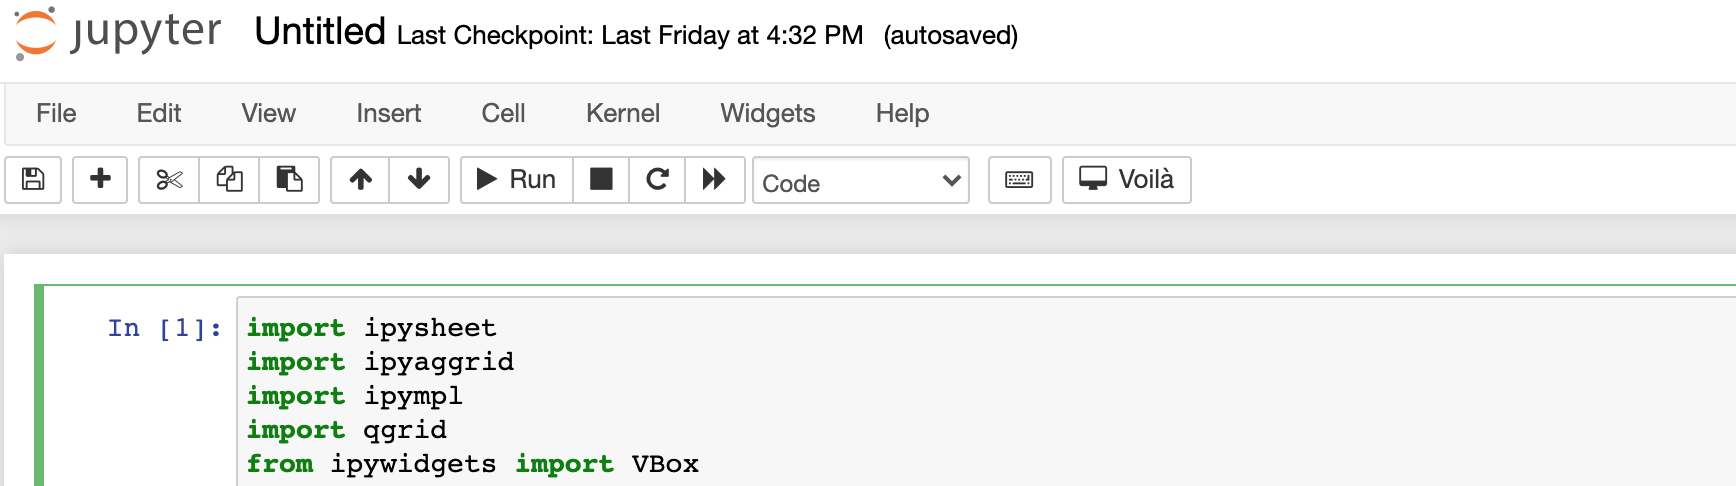
Pressing the voila button opens a new tab displaying the notebook as a webapp the same as if running voila from the command line.

For now we will run our apps locally but later we will run them in Azure.



## Exercises
- After installing Voila, create a new local notebook and copy the code below. Use the Voila Button to view the code as a webapp.
```
from ipywidgets import Accordion, Button, Dropdown, FileUpload, HBox, Image, Output, Tab, VBox, Layout
from PIL import Image as PilImage, ImageOps
from skimage import color
import io
class FilteredImageApp:
  def __init__(self):
    self.file_upload = FileUpload(accept='image/*', multiple=False)
    self.apply_button = Button(description='Apply Filter!')
    self.apply_button.on_click(self.on_apply)
    self.output = Output()
    self.filter_choice = Dropdown(description='filter', value='None', options=['None', 'Gray'])
    self.tab = Tab(layout=Layout(height='700px'))
    self.tab.children = [self.output]
    self.tab.set_title(0,'Debug Information')
    self.header = HBox([self.filter_choice, self.file_upload, self.apply_button])
    self.container = VBox([self.header, self.tab])
  def on_apply(self, btn):
    with self.output:
      print(f'Applying new filter: {self.filter_choice.value}')
      upload_dict = self.file_upload.value
      img = list(upload_dict.values())[0]
      img_meta = img['metadata']
      img_content = img['content']
      print(img_meta)
      print(f'Name: {img_meta["name"]},Size: {img_meta["size"]}')
      if self.filter_choice.value=='None':
        img = Image(value=img_content)
      if self.filter_choice.value=='Gray':
        img_array = io.BytesIO()
        ImageOps.grayscale(PilImage.open(io.BytesIO(img_content))).save(img_array, format='PNG')
        new_img = img_array.getvalue()
        print(img_array)
        img = Image(value=new_img)
      self.tab.children = list(self.tab.children) + [img]
      self.tab.set_title(len(self.tab.children)-1, img_meta['name']+self.filter_choice.value)
  def get_layout(self):
    return self.container
FilteredImageApp().get_layout()
```
- Having all of the code within a notebook can make the notebook difficult to read and also limits code reuse.  Copy the all the code for the FilteredImageApp class above (everything except the line `FilteredImageApp().get_layout()` and save to a text file named `image_app.py`.  Now create a new notebook: MyImageApp with the following code:
```
from image_app import FilteredImageApp
FilteredImageApp().get_layout()
```
Press the voila button to see the webapp.  Also, try opening the notebook from the commandline using voila.


# Web Services and REST
While Jupyter Widgets and Voila allow one to quickly make user facing webapps that are useful for getting one's work in front of humans, it's often the case that one's work will interface with other applications.  
For instance you may have trained a classifier which identifies certain users as interested in buying a new car.  So if such a user visits one of several different webpages that user should have a car ad displayed.  Those webpages should be able to pass a feature vector (or list of feature vectors) to your application and your application should be able to give a response.
There are many ways to accomplish this task.  Howerver, we would like the following constraints to be met:
- We don't want to require either party to use a specific language.
- We want to use a protocol that is commonly used, fast and well understood.
- We'd like to keep all transactions stateless, i.e., we shouldn't have to remember something about past messages to respond to the current message.

To this end RESTful web services are the predominate way to facilitate such interactions.

Specifically an HTTP-based REST API will:
- Use an standard URI such as https://example.com/api
- Use standard HTTP operations
  - GET request a representation of the target resource’s state.
  - POST Request the target resource process a representation.
  - PUT Set the target resource’s state to the state defined in the request.
  - DELETE Remove the target resource’s state.
- A media format capable of describing the data in the resource, typically this is JSON, XML or Text but could be images, video or any other file format.



# The Requests Library

The [requests library](https://requests.readthedocs.io/en/master/) is a commonly used HTTP client for python and is often used to create client libraries for RESTful APIs, in fact looking at the source of the [tweepy package](https://github.com/tweepy/tweepy/blob/master/setup.py) used to previously to interact with Twitter data we see it uses the requests library.

In [ ]:
#To install requests (It is installed by default in anaconda)
!pip install requests

To demonstate the requests library we will use the [Earthquake Catalog API from the US Geological survey](https://earthquake.usgs.gov/fdsnws/event/1/).

In [ ]:
# To use the requests library:
import requests
resp=requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2014-01-01&endtime=2014-02-01&minmagnitude=5')

In [ ]:
#print the status code 2XX is a success, 3xx, 4xx, 5xx are various failures
print(resp.status_code)
#print the response (interprets the media type as text) 
print(resp.text[0:100])
#If the text is JSON the requests library has a helper function to convert the
#JSON to Lists, Dictionaries, etc
json = resp.json()
print(json['metadata'].keys())
#if you need the raw bytes (the data might be an image), you can use content
print(resp.content[0:100])

200
{"type":"FeatureCollection","metadata":{"generated":1616455525000,"url":"https://earthquake.usgs.gov
dict_keys(['generated', 'url', 'title', 'status', 'api', 'count'])
b'{"type":"FeatureCollection","metadata":{"generated":1616455525000,"url":"https://earthquake.usgs.gov'


In addition to being able to make get requests, the requests library is capable of making post, put and delete requests.  It is used by many python libraries including the twitter api used in many of our examples.

In [ ]:
import pandas as pd
#Pandas can normalize json into a data frame, here the useful data is in the "Features" key.
pd.json_normalize(json['features'])

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,properties.cdi,properties.mmi,properties.alert,properties.status,properties.tsunami,properties.sig,properties.net,properties.code,properties.ids,properties.sources,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,usc000men8,5.1,"151km SSE of Esso, Russia",1391186346990,1396921398000,720,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,None,reviewed,0,400,us,c000men8,",usc000men8,",",us,",",cap,general-link,geoserve,nearby-cities,origi...",None,1.732,0.96,75.0,mb,earthquake,"M 5.1 - 151km SSE of Esso, Russia",Point,"[159.5622, 54.6664, 169.22]"
1,Feature,usc000mqef,5.0,"25km NNW of Calama, Chile",1391020008000,1396921396000,-180,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,None,reviewed,0,385,us,c000mqef,",usc000mqef,",",us,",",general-link,geoserve,nearby-cities,origin,ph...",None,NaN,1.04,NaN,mb,earthquake,"M 5.0 - 25km NNW of Calama, Chile",Point,"[-69.01, -22.251, 92.7]"
2,Feature,usc000mcu0,5.1,"52km WNW of Mawlaik, Burma",1391003210340,1396921395000,390,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,None,reviewed,0,400,us,c000mcu0,",usc000mcu0,",",us,",",cap,geoserve,nearby-cities,origin,phase-data,...",None,2.425,0.68,19.0,mb,earthquake,"M 5.1 - 52km WNW of Mawlaik, Burma",Point,"[93.9581, 23.8428, 59.11]"
3,Feature,usc000mcsn,5.6,"39km SSE of Putre, Chile",1390989710730,1422658897017,-180,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,3.0,3.8,4.310,green,reviewed,0,484,us,c000mcsn,",usc000mcsn,",",us,",",cap,dyfi,geoserve,losspager,moment-tensor,mom...",None,0.653,1.13,26.0,mww,earthquake,"M 5.6 - 39km SSE of Putre, Chile",Point,"[-69.3735, -18.5087, 120.03]"
4,Feature,usc000mcj6,5.6,"108km SSE of Auki, Solomon Islands",1390955548240,1594407607741,660,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,4.655,green,reviewed,0,482,us,c000mcj6,",usc000mcj6,",",us,",",cap,geoserve,losspager,moment-tensor,nearby-c...",None,1.272,0.70,16.0,mwb,earthquake,"M 5.6 - 108km SSE of Auki, Solomon Islands",Point,"[161.2282, -9.5949, 41]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Feature,usc000lvt0,5.0,"84km NNW of Davila, Philippines",1388689344590,1394151956000,480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,None,reviewed,0,385,us,c000lvt0,",usc000lvt0,",",us,",",cap,general-link,geoserve,nearby-cities,origi...",None,3.732,1.06,58.0,mb,earthquake,"M 5.0 - 84km NNW of Davila, Philippines",Point,"[120.2167, 19.1548, 15.15]"
108,Feature,usc000lvk3,5.0,"52km NE of San Isidro, Philippines",1388656577400,1394151955000,480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,None,reviewed,0,385,us,c000lvk3,",usc000lvk3,",",us,",",cap,general-link,geoserve,nearby-cities,origi...",None,3.404,1.08,49.0,mb,earthquake,"M 5.0 - 52km NE of San Isidro, Philippines",Point,"[126.3537, 10.4088, 54.11]"
109,Feature,usc000lvhr,5.2,"60km S of Lar, Iran",1388632434570,1594407556956,210,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,6.214,green,reviewed,0,416,us,c000lvhr,",usc000lvhr,atlas20140102031354,",",us,atlas,",",cap,geoserve,losspager,moment-tensor,nearby-c...",None,1.158,0.72,33.0,mwb,earthquake,"M 5.2 - 60km S of Lar, Iran",Point,"[54.4482, 27.1502, 8]"
110,Feature,usc000lvb5,6.5,"32km W of Sola, Vanuatu",1388592209000

# Flask
[Flask](https://flask.palletsprojects.com/en/1.1.x/) is a micro web framework written in Python.  When properly configured, it can easily scale to large user bases.  We will use it to demostrate how to expose RESTful data science interfaces which can be called from other interfaces.

Flask ships with the Anaconda distribution of Python or can be installed using `pip install flask`.

To create a test web service, one creates a python file in an empty directory as follows:
```
from flask import Flask
from flask import abort, request, escape, make_response
import numpy as np
app = Flask(__name__)
# The @ is a decorator, it tells flask when the root of the server is call execute the hello_world function
# The simplest route, it returns text
@app.route('/')
def hello_world():
    return "hello world"

# Here we post json of maniputlate it and return a resulat.
@app.route('/sum', methods=['POST', 'GET'])
def sum():
    if request.method == "POST":
        if request.json and 'data' in request.json:
            print(request.json)
            return {"sum": float(np.sum(request.json['data']))}
        else: abort(405)
    else: abort(405)

        
@app.errorhandler(405)
def malformed_query(error):
    resp = make_response("Malformed Query")
    return resp
```
To run the app we use `flask` at the command inline in the directory of the python file.  In production we will not use this command, instead we will use a production grade server such as Nginx or Apache to serve the web application.

## Exercises
1. Using ScikitLearn: 
  - create a model to classify the the classes in the iris dataset
  - pickle the model
  - Create a flask app with a POST method, it should take a list of lists, and return a list of strings classifying the each of the lists as a type of iris.

Flask can be used for more than just simple computations, it can provide interfaces the Create, Read, Update, and Delete (CRUD) elements from a database.  Here we used SQLLITE as the db but this can be changed to a production db by simply changing the url.
```
from flask import Flask
from sqlalchemy import create_engine, text
from sqlalchemy.orm import scoped_session, sessionmaker
from flask import abort, request, escape, make_response
import numpy as np

app = Flask(__name__)

#Setup of db, we use sqlite for convenience.
engine = create_engine("sqlite+pysqlite:///app.db", echo=True)

with engine.connect() as conn:
    if not engine.dialect.has_table(conn, 'users'):
        conn.execute(text("CREATE TABLE users (id int, username string)"))

# Using <> tags one can pass variables in the URI path
@app.route('/getuser/<int:id>')
def getuser(id):
    """
    Returns the username of the id in the db
    """
    global engine
    if request.method == "GET":
        with engine.connect() as conn:
            #Never f"select * from users WHERE id={id}"
            results=conn.execute(text("select * from users WHERE id=:id"),{'id': id})
            return {'data': [{'username': r[1]} for r in results.fetchall()]}
    else: abort(405)

    return {"id": id}


@app.route('/insert', methods=['PUT'])
def insert():
    """
    Takes json of the form {"username": username, "id": id} and puts in db
    """
    global engine
    if request.method == "PUT":
        print(1)
        if request.json:
            try:
                with engine.connect() as conn:
                    # Never run as:
                    #conn.execute(
                    #    text(f"INSERT INTO users (id, username) VALUES (int(request.json['id'], request.json['username'])")
                    #)
                    #This would allow a request such as {'id': 1; SELECT * from sensitive data, 'username': 'haha ; INSERT evil INTO
                    #plan
                    #This is know as a SQL injection attacks
                    conn.execute(
                        text("INSERT INTO users (id, username) VALUES (:id, :username)"),
                        [{"id": int(request.json['id']), "username": request.json['username']}]
                    )
                return "record created"
            except:
                abort(400)
        else: 
            abort(405)
    else: abort(405)


@app.route('/getusers', methods=['GET'])
def getusers():
    """
    Gets all users in the db and passes them as json
    """
    global engine
    if request.method == "GET":
        with engine.connect() as conn:
            results=conn.execute(text("select * from users"))
            return {'data': [{'id': r[0], 'username': r[1]} for r in results.fetchall()]}
    else: abort(405)


@app.errorhandler(405)
def malformed_query(error):
    """
    Redirects 405 errors
    """
    resp = make_response("Malformed Query")
    return resp
```

You can name the file app.py, initializing the database by typing `sqlite3 app.db` and run the app by typing `flask`.  You can test each route with curl of using the requests library.

Using the requests library this would look like:
```
import requests
import json

r=requests.get('http://127.0.0.1:5000/getusers')
r
r.json()
r=requests.put('http://127.0.0.1:5000/insert', json={'id':9, 'username':'phil'})
r
r.json()
r=requests.get('http://127.0.0.1:5000/getusers')
r
r.json()
r=requests.get('http://127.0.0.1:5000/getuser/7')

```


## Exercises
Add a password field to the db, it is bad to store a password as plain text.  Consider using MD5 or SHA256 hashes.

Build a small voila app the can create, delete, change the password or list users by querying the API.

Flask apps are often used to collect data about users viewing a website.  For instance you may wish to determine which of two versions of a website are more likely for a user to click a particualar link.  You can randomly display website a or b, based off the click the webpage can make a put requet to a flask app to log the results of the clicks.  This is part of A/B Testing. 

# Productionizing a Flask application
- nginx
- SSL
- Authentication
# Project
- Flask
- Voila - use request to interact with Flask.

